# 1. Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
# import sklearn libararies
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 2. Read Data

In [2]:
data = pd.read_csv('tech_challenge2021_train.csv')

# 3. Glimpse Data

In [3]:
data.sample(10)

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
59205,USROP_A 2 N-SH_F-14d,3066.663,7.362351,17936.00006,12.609999,25.420000,139.369995,1984.329956,1.370000,215.90,138.956732,2886.304819,32.245
135071,USROP_A 4 N-SH_F-15Sd,2258.702,2.926585,23425.00685,14.580000,19.827240,139.000000,3987.855834,1.460000,311.15,139.395203,2118.073488,25.880
139100,USROP_A 4 N-SH_F-15Sd,2583.881,2.512902,23096.74746,10.521147,10.402824,201.320000,2110.821439,1.460000,215.90,121.594507,2392.288332,80.440
100884,USROP_A 3 N-SH-F-15d,3086.740,7.352732,15110.85345,22.654362,29.260800,139.736000,2121.378954,11.266297,215.90,125.905449,2768.616662,15.085
56066,USROP_A 2 N-SH_F-14d,2937.449,6.220269,18186.00006,10.979999,8.320000,160.190002,2050.840087,1.360000,215.90,138.752792,2830.772088,53.125
63347,USROP_A 2 N-SH_F-14d,3267.557,2.753234,17591.00037,11.280000,31.260000,160.039993,1962.780029,1.350000,215.90,141.964892,2935.670837,40.576
54224,USROP_A 2 N-SH_F-14d,2882.000,7.831420,17111.99951,12.710000,12.620000,141.000000,1985.189941,1.350000,215.90,136.234092,2798.431589,27.949
23370,USROP_A 2 N-SH_F-14d,1143.043,5.567650,13516.00036,7.280001,24.860001,120.470001,4081.419923,1.190000,444.50,104.898210,1142.552858,134.513
186552,USROP_A 5 N-SH-F-5d,3599.536,8.433054,20852.99988,22.400000,7.850000,134.080002,2089.320068,1.450000,215.90,141.862915,3133.622587,32.680
82142,USROP_A 3 N-SH-F-15d,1704.021,1.859729,24207.07917,11.660034,20.762976,129.300000,4453.120823,12.017384,444.50,130.317088,1651.122936,169.500


In [4]:
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [5]:
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


# 4. Exploratory Data Analysis

In [6]:
data.dropna(axis=0, inplace=True)
data.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Rate of Penetration m/h,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000,198928.000000
mean,2411.781370,6.087997,17451.302922,14.430343,24.978426,152.368019,2873.576072,4.008286,297.470693,127.503708,2153.624785,67.197939
std,1066.443448,3.957126,4236.531326,7.239629,15.086731,49.998842,1055.406219,4.496288,100.344171,15.551890,846.519288,50.519888
min,225.171000,0.001814,1432.661618,0.008135,0.330000,0.000000,185.420836,1.020000,215.900000,84.047945,225.162770,0.000000
25%,1548.686750,3.283486,14655.999760,9.639866,12.990000,129.250000,1993.927917,1.300000,215.900000,124.925435,1516.593360,25.380000
50%,2697.182500,5.190356,16683.999630,12.798921,21.090000,139.736000,2121.382739,1.350000,215.900000,130.905851,2528.949222,54.490000
75%,3288.946500,8.127138,21153.529060,17.815448,32.470001,179.283000,3987.855834,10.849026,444.500000,138.719433,2865.091577,98.140000
max,4090.001000,31.411272,24998.459410,36.489128,99.206304,311.230011,4538.450195,12.017384,444.500000,152.926842,3248.389893,260.899000


In [7]:
data.isna().any()

Well Identifier                   False
Measured Depth m                  False
Weight on Bit kkgf                False
Average Standpipe Pressure kPa    False
Average Surface Torque kN.m       False
Rate of Penetration m/h           False
Average Rotary Speed rpm          False
Mud Flow In L/min                 False
Mud Density In g/cm3              False
Diameter mm                       False
Average Hookload kkgf             False
Hole Depth (TVD) m                False
USROP Gamma gAPI                  False
dtype: bool

In [8]:
wells = data['Well Identifier'].unique()
wells

array(['USROP_A 0 N-NA_F-9_Ad', 'USROP_A 1 N-S_F-7d',
       'USROP_A 2 N-SH_F-14d', 'USROP_A 3 N-SH-F-15d',
       'USROP_A 4 N-SH_F-15Sd', 'USROP_A 5 N-SH-F-5d',
       'USROP_A 6 N-SH_F-9d'], dtype=object)

In [9]:
len(wells)

7

In [10]:
data.columns.tolist()

['Well Identifier',
 'Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Rate of Penetration m/h',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI']

In [11]:
X = data.drop(columns=['Well Identifier', 'Rate of Penetration m/h'])
y = data['Rate of Penetration m/h']

In [12]:
X, y = shuffle(X, y, random_state=42)

In [13]:
X

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
95319,2886.816,11.920407,13747.38762,22.303205,139.736,2121.382739,10.849026,215.90,124.987378,2645.491178,7.350
99368,3024.293,6.128940,14811.55204,23.271259,139.736,2121.378954,11.182843,215.90,125.260440,2733.591790,14.002
131291,2012.594,5.333116,22280.20135,11.600000,124.140,3987.855834,1.450000,311.15,135.214376,1906.749552,103.520
162157,3748.516,3.304420,15244.43248,17.475138,179.505,1705.918630,1.310000,215.90,140.589594,2945.014786,57.565
97546,2966.128,3.889101,14624.13875,21.763590,139.736,2121.378954,11.182843,215.90,126.296899,2697.390998,9.994
...,...,...,...,...,...,...,...,...,...,...,...
119879,4014.792,16.772031,16404.12376,32.389135,139.736,2077.184268,11.266297,215.90,134.440243,3150.273506,67.673
103694,3170.837,1.850657,16055.68341,16.283374,139.736,2121.382739,11.182843,215.90,132.571442,2810.914978,27.000
131932,2058.619,5.863368,22478.97720,11.270001,140.000,3987.855834,1.460000,311.15,135.642655,1946.937432,85.330
146867,3062.280,8.187342,19464.93405,11.876965,234.380,2016.072577,1.320000,215.90,130.639139,2654.130125,9.370


# 5. Checking for data redundancy

In [14]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
Measured Depth m,1.000000,0.303758,0.211211,0.795906,0.189465,-0.748654,0.126179,-0.771158,0.762159,0.983941,-0.490107
Weight on Bit kkgf,0.303758,1.000000,-0.086641,0.395223,0.204571,-0.408389,-0.001711,-0.443644,-0.102894,0.268754,-0.326573
Average Standpipe Pressure kPa,0.211211,-0.086641,1.000000,0.169800,0.161257,0.287266,0.084552,0.053737,0.540892,0.276292,0.163643
Average Surface Torque kN.m,0.795906,0.395223,0.169800,1.000000,0.135598,-0.555432,0.383917,-0.608929,0.518171,0.777057,-0.431413
Average Rotary Speed rpm,0.189465,0.204571,0.161257,0.135598,1.000000,-0.265543,-0.268141,-0.257578,-0.021588,0.154856,-0.305698
Mud Flow In L/min,-0.748654,-0.408389,0.287266,-0.555432,-0.265543,1.000000,0.054360,0.906824,-0.265686,-0.706204,0.623654
Mud Density In g/cm3,0.126179,-0.001711,0.084552,0.383917,-0.268141,0.054360,1.000000,0.051897,0.076966,0.127034,0.113619
Diameter mm,-0.771158,-0.443644,0.053737,-0.608929,-0.257578,0.906824,0.051897,1.000000,-0.346287,-0.747016,0.574879
Average Hookload kkgf,0.762159,-0.102894,0.540892,0.518171,-0.021588,-0.265686,0.076966,-0.346287,1.000000,0.816682,-0.218936
Hole Depth (TVD) m,0.983941,0.268754,0.276292,0.777057,0.154856,-0.706204,0.127034,-0.747016,0.816682,1.000000,-0.495857


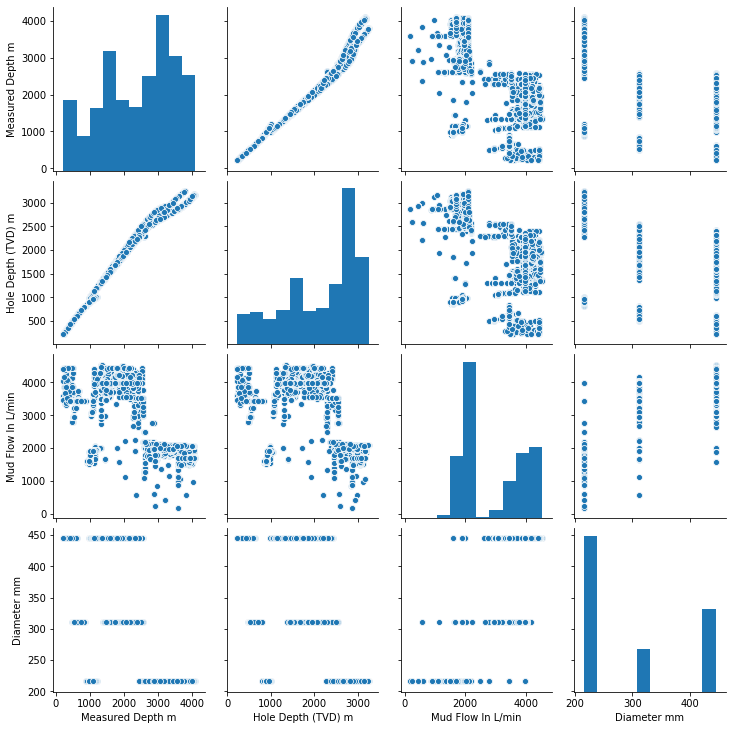

In [15]:
sb.pairplot(X[['Measured Depth m', 'Hole Depth (TVD) m', 'Mud Flow In L/min', 'Diameter mm']])

# 6. Removing redudant column

### From above cells we can see that the columns "Measured Depth m" and "Hole Depth (TVD) m" have a very high correlation of 0.98. Therefore, we have removed the column "Hole Depth m" from the data

In [16]:
X.drop(columns = 'Hole Depth (TVD) m', index = 1)

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,USROP Gamma gAPI
95319,2886.816,11.920407,13747.38762,22.303205,139.736,2121.382739,10.849026,215.90,124.987378,7.350
99368,3024.293,6.128940,14811.55204,23.271259,139.736,2121.378954,11.182843,215.90,125.260440,14.002
131291,2012.594,5.333116,22280.20135,11.600000,124.140,3987.855834,1.450000,311.15,135.214376,103.520
162157,3748.516,3.304420,15244.43248,17.475138,179.505,1705.918630,1.310000,215.90,140.589594,57.565
97546,2966.128,3.889101,14624.13875,21.763590,139.736,2121.378954,11.182843,215.90,126.296899,9.994
...,...,...,...,...,...,...,...,...,...,...
119879,4014.792,16.772031,16404.12376,32.389135,139.736,2077.184268,11.266297,215.90,134.440243,67.673
103694,3170.837,1.850657,16055.68341,16.283374,139.736,2121.382739,11.182843,215.90,132.571442,27.000
131932,2058.619,5.863368,22478.97720,11.270001,140.000,3987.855834,1.460000,311.15,135.642655,85.330
146867,3062.280,8.187342,19464.93405,11.876965,234.380,2016.072577,1.320000,215.90,130.639139,9.370


# 7. Visualizing data distribution

### The data distribution is not normal across various columns, thus we will scale the data using suitable scaler

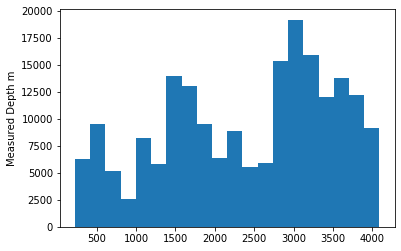

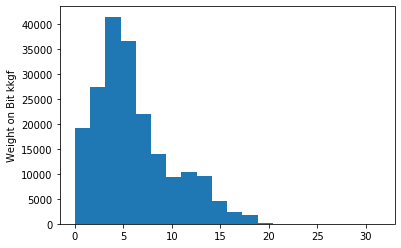

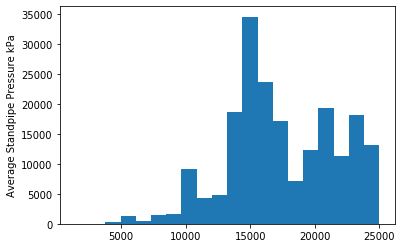

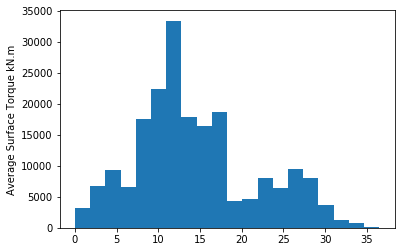

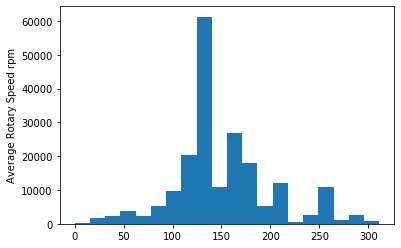

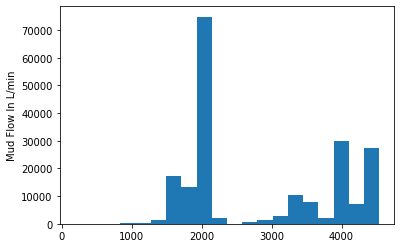

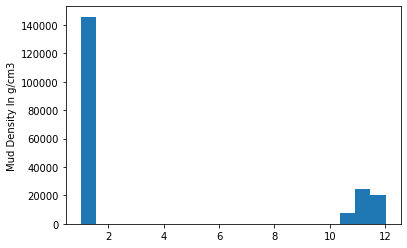

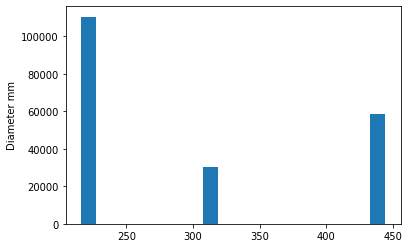

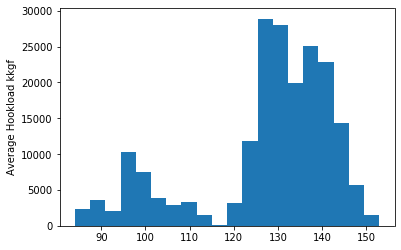

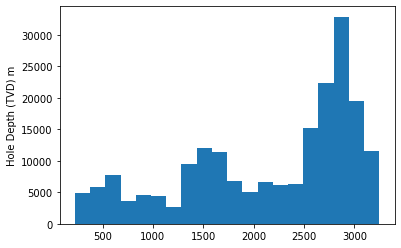

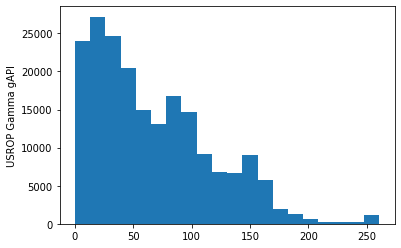

In [17]:
for col in X.columns.tolist():
    plt.hist(X[col], bins = 20)
    plt.ylabel(col)
    plt.show()

# 8. Splitting data into training and testing data

### The data is split into training and testing data in the ratio 80:20

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape)

(159142, 11) (39786, 11)


In [20]:
print(y_train.shape, y_test.shape)

(159142,) (39786,)


# 9. Scaling the data

### The Power Transformer scaler is used. The scaler is first fit on the training data and then it is used to transform the test data

In [21]:
scaler = PowerTransformer(method = 'yeo-johnson')

In [22]:
X_train.columns

Index(['Measured Depth m', 'Weight on Bit kkgf',
       'Average Standpipe Pressure kPa', 'Average Surface Torque kN.m',
       'Average Rotary Speed rpm', 'Mud Flow In L/min', 'Mud Density In g/cm3',
       'Diameter mm', 'Average Hookload kkgf', 'Hole Depth (TVD) m',
       'USROP Gamma gAPI'],
      dtype='object')

In [23]:
scaler.fit(X_train)

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [24]:
X_train = scaler.transform(X_train)

In [25]:
X_train = pd.DataFrame(X_train, columns = ['Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI'])

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_test = pd.DataFrame(X_test, columns = ['Measured Depth m',
 'Weight on Bit kkgf',
 'Average Standpipe Pressure kPa',
 'Average Surface Torque kN.m',
 'Average Rotary Speed rpm',
 'Mud Flow In L/min',
 'Mud Density In g/cm3',
 'Diameter mm',
 'Average Hookload kkgf',
 'Hole Depth (TVD) m',
 'USROP Gamma gAPI'])

In [28]:
X_train.describe()

,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
count,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05,1.591420e+05
mean,1.564743e-16,-4.858279e-16,-8.366473e-16,1.097791e-17,4.718382e-16,-4.036492e-15,-5.145576e-16,1.205574e-11,5.705640e-16,-2.463082e-16,-1.180837e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.982588e+00,-2.520713e+00,-3.459771e+00,-2.795303e+00,-3.756246e+00,-1.002334e+01,-1.176172e+00,-8.698324e-01,-1.933191e+00,-1.912776e+00,-2.712417e+00
25%,-8.258325e-01,-6.321034e-01,-6.722932e-01,-5.944096e-01,-4.316161e-01,-7.909500e-01,-5.741092e-01,-8.698324e-01,-4.557460e-01,-8.686134e-01,-7.710222e-01
50%,2.585938e-01,-2.721048e-02,-1.980725e-01,-1.186264e-01,-2.177932e-01,-6.118755e-01,-4.871074e-01,-8.698324e-01,1.004683e-02,3.930876e-01,1.276752e-02
75%,8.243044e-01,6.720330e-01,8.741585e-01,5.452236e-01,5.608612e-01,1.071765e+00,1.619028e+00,1.339058e+00,7.633226e-01,8.703695e-01,7.719531e-01
max,1.605294e+00,3.509671e+00,1.822119e+00,2.512313e+00,2.938705e+00,1.387097e+00,1.638382e+00,1.339058e+00,2.668896e+00,1.451978e+00,2.380461e+00


# 10. Building a base model

### Initial model is trained to know the basic accuracy we have to work with.

In [29]:
# Base model
model = RandomForestRegressor(n_estimators=50, random_state=42)

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [31]:
y_pred_test = model.predict(X_test)

In [32]:
mean_absolute_error(y_test.values, y_pred_test)

0.11330104526538037

# 11. Hyperparameter tuning using Coarse to fine Tuning informed search

### Random Search is performed first to narrow down the parameter grid using suitable accuracy values for different ranges/ combinations of parameters. Later, grid search is performed on the reduced range of parameters. This helps to perform informed search.

## 11.a. Random Search

In [33]:
# Number of trees in random forest
n_estimators = list(range(50,110,10))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Minimum number of samples required to split a node
min_samples_split = [2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, return_train_score=True, n_jobs=-1)

In [35]:
# Fit the random search model
search1 = rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 108.2min finished


In [36]:
results1 = pd.DataFrame(search1.cv_results_)
results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_bootstrap,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,69.940165,0.176783,1.698956,0.272324,80,4,2,sqrt,False,"{'n_estimators': 80, 'min_samples_split': 4, '...",...,0.997616,0.000379,12,0.999760,0.999740,0.999749,0.999752,0.999759,0.999752,7.185201e-06
1,118.313956,0.754131,0.942669,0.091541,60,4,2,auto,True,"{'n_estimators': 60, 'min_samples_split': 4, '...",...,0.995999,0.000311,40,0.998868,0.998925,0.998777,0.998926,0.998918,0.998883,5.698398e-05
2,261.896864,4.899790,1.465033,0.062795,90,4,1,auto,False,"{'n_estimators': 90, 'min_samples_split': 4, '...",...,0.995752,0.001025,46,0.999875,0.999925,0.999760,0.999909,0.999879,0.999869,5.786038e-05
3,53.502441,0.543502,1.002135,0.059730,60,2,1,sqrt,False,"{'n_estimators': 60, 'min_samples_split': 2, '...",...,0.998057,0.000388,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.818167e-14
4,44.650731,0.687825,1.111343,0.092686,70,4,1,log2,True,"{'n_estimators': 70, 'min_samples_split': 4, '...",...,0.997116,0.000432,23,0.999398,0.999394,0.999336,0.999395,0.999394,0.999384,2.364630e-05
5,101.003676,1.220305,0.763200,0.023862,50,2,2,auto,True,"{'n_estimators': 50, 'min_samples_split': 2, '...",...,0.995924,0.000436,42,0.998884,0.998911,0.998748,0.998870,0.998917,0.998866,6.163463e-05
6,44.681909,0.576735,0.799670,0.029119,50,2,2,log2,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",...,0.997596,0.000362,13,0.999742,0.999732,0.999745,0.999738,0.999760,0.999743,9.369521e-06
7,63.688492,0.538767,1.549204,0.037528,100,2,2,log2,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",...,0.996398,0.000399,30,0.998820,0.998860,0.998773,0.998843,0.998825,0.998824,2.917455e-05
8,31.975199,0.212519,0.785233,0.072422,50,4,2,log2,True,"{'n_estimators': 50, 'min_samples_split': 4, '...",...,0.996335,0.000354,35,0.998771,0.998801,0.998721,0.998766,0.998809,0.998774,3.107593e-05
9,100.478799,1.456293,0.795683,0.036661,50,4,2,auto,True,"{'n_estimators': 50, 'min_samples_split': 4, '...",...,0.995918,0.000420,43,0.998895,0.998911,0.998807,0.998905,0.998871,0.998878,3.785350e-05


In [38]:
results1["params"][0]

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'bootstrap': False}

## 11.b. Reducing the parameter grid on the basis of accuracy

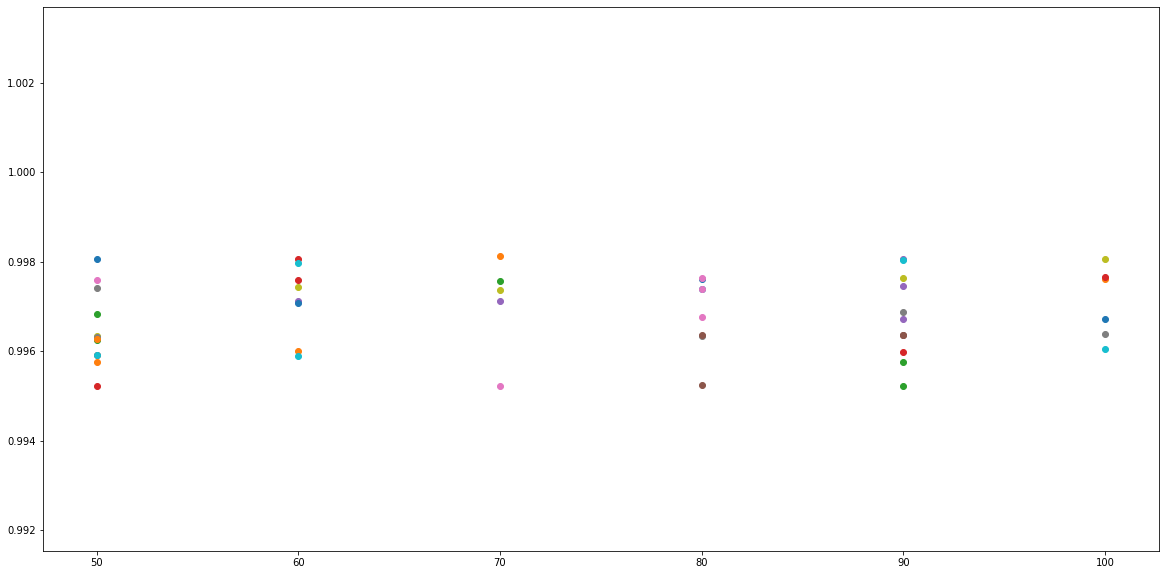

In [44]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.scatter(results1["params"][i]["n_estimators"], results1["mean_test_score"][i])
plt.show()

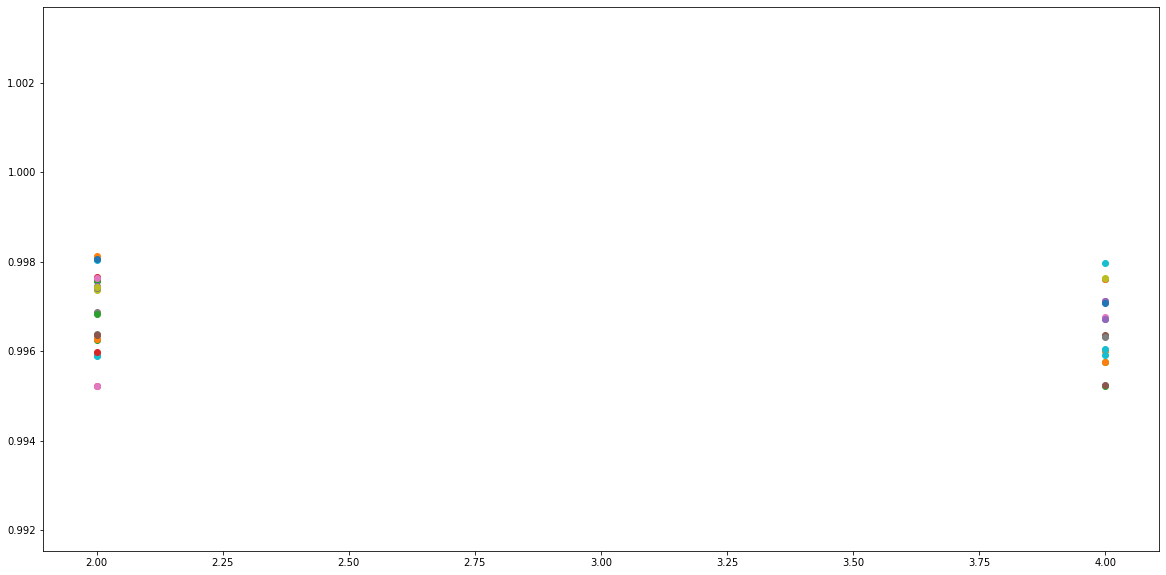

In [45]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.scatter(results1["params"][i]['min_samples_split'], results1["mean_test_score"][i])
plt.show()

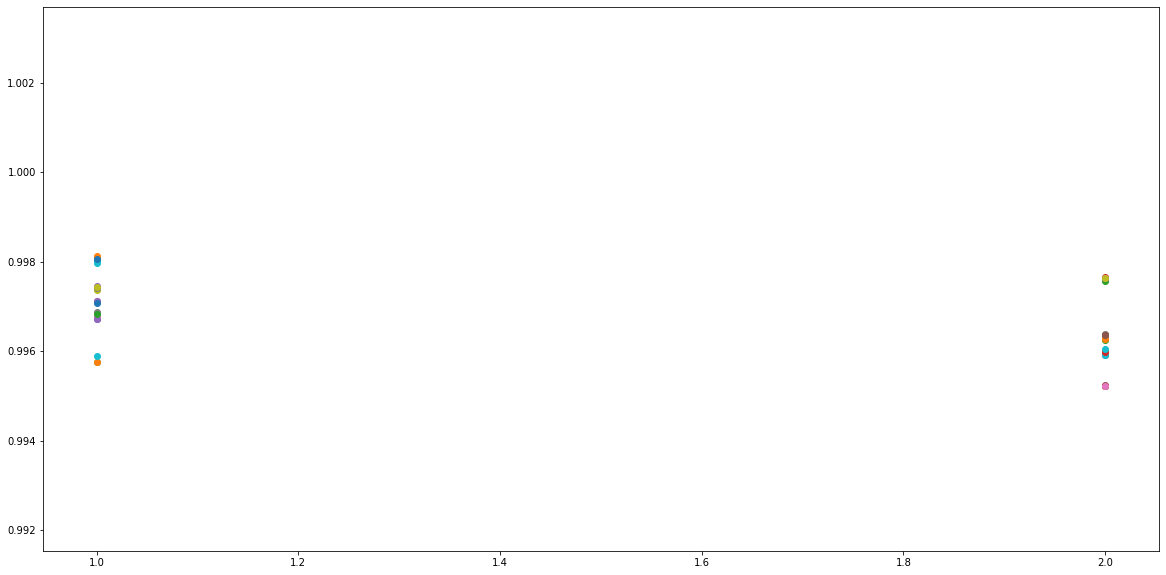

In [49]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.scatter(results1["params"][i]['min_samples_leaf'], results1["mean_test_score"][i])
plt.show()

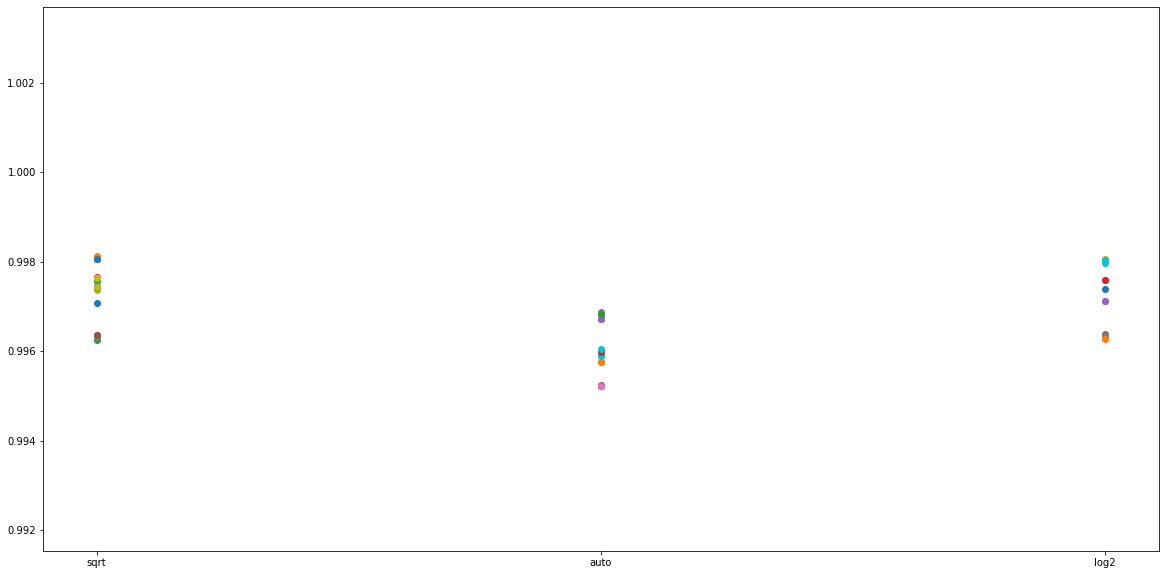

In [51]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.scatter(results1["params"][i][ 'max_features'], results1["mean_test_score"][i])
plt.show()

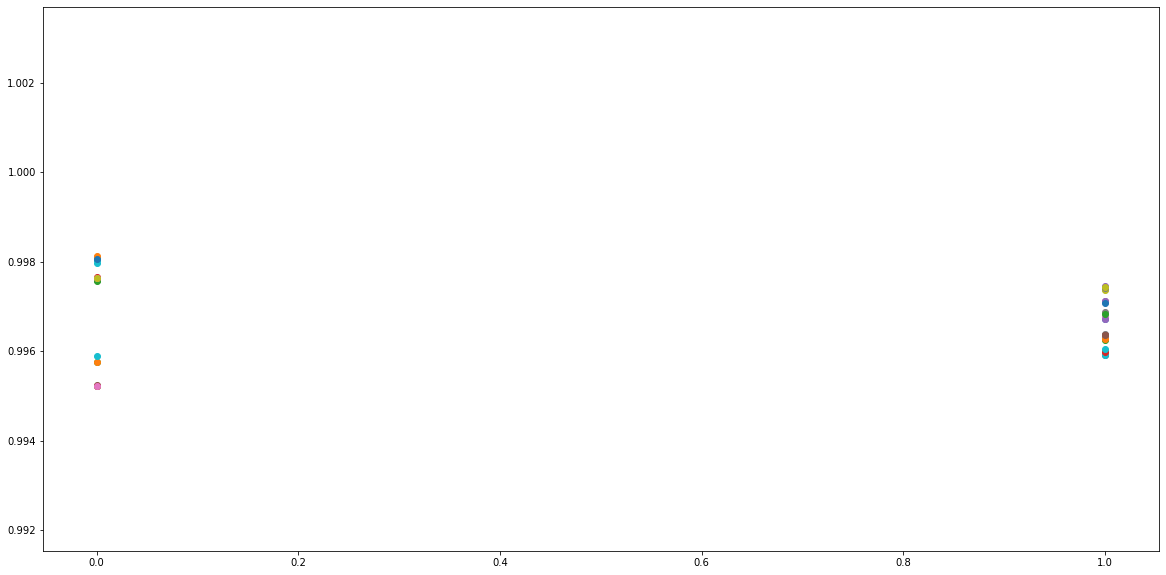

In [52]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.scatter(results1["params"][i][ 'bootstrap'], results1["mean_test_score"][i])
plt.show()

#### The best parameters are:

In [59]:
search1.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [53]:
rmodel = search1.best_estimator_
rmodel

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 11.c. Improved model after random search

In [54]:
rmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
y_pred_test = rmodel.predict(X_test)

In [64]:
mean_absolute_error(y_test.values, y_pred_test)

0.05231629469405992

In [65]:
param_grid = {
    'bootstrap': [False],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [65, 70, 75, 90]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

## 11.d. Grid Search

In [66]:
search2 = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.3min finished


#### The best parameters are:

In [67]:
search2.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

#### The optimized model is:

In [68]:
gmodel = search2.best_estimator_

In [69]:
gmodel

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 11.e. Improved model after Grid search

In [70]:
gmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
y_pred_test = gmodel.predict(X_test)

In [72]:
mean_absolute_error(y_test.values, y_pred_test)

0.05277261066815559

# 12. Saving model and scaler to files

In [76]:
pickle.dump(gmodel, open('model.pkl', 'wb'))

In [77]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [78]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))
        
    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling 
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['Measured Depth m','Weight on Bit kkgf','Average Standpipe Pressure kPa',
                             'Average Surface Torque kN.m','Average Rotary Speed rpm','Mud Flow In L/min',
                             'Mud Density In g/cm3','Diameter mm','Average Hookload kkgf','Hole Depth (TVD) m',
                             'USROP Gamma gAPI']]
        return self.scaler.transform(features)
        
    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

In [79]:
model = Model('model.pkl', 'scaler.pkl')

# 13. Daily leaderboard submission

In [80]:
open_test_features = pd.read_csv('tech_challenge2021_test.csv')

In [81]:
open_test_features.head()

,Well Identifier,Measured Depth m,Weight on Bit kkgf,Average Standpipe Pressure kPa,Average Surface Torque kN.m,Average Rotary Speed rpm,Mud Flow In L/min,Mud Density In g/cm3,Diameter mm,Average Hookload kkgf,Hole Depth (TVD) m,USROP Gamma gAPI
0,TC-2021-TW,365.150,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.124187,20.774
1,TC-2021-TW,365.303,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.276587,20.774
2,TC-2021-TW,365.455,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.428682,20.774
3,TC-2021-TW,365.608,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.581082,20.774
4,TC-2021-TW,365.760,10.656246,23053.9448,22.631313,169.781,3491.436904,1.31,254.0,136.662392,365.733178,20.774


In [82]:
test_prediction = model.predict(open_test_features)

In [83]:
test_prediction

array([32.05067931, 32.05067931, 32.05067931, ..., 19.47705307,
       19.47705307, 19.47705307])

In [84]:
test_prediction_for_submission = pd.DataFrame(test_prediction, columns = ['Rate of Penetration'])

In [85]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='Rate of Penetration', comments='', fmt='%f')

# 14. Submitting code for final submission

In [86]:
!pip freeze > requirements.txt

In [87]:
!conda env export > environment.yml